# Importação de bibliotecas

In [223]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

import kagglehub

## Leitura do DataFrame

In [224]:
# Download da versão mais recente
path = kagglehub.dataset_download("sahilislam007/letterbox-movie-classification-dataset")

df = pd.read_csv(path+'/Letterbox Movie Classification Dataset.csv')

In [225]:
# Observação geral
df.head()

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [226]:
df.drop(columns='Unnamed: 0', inplace=True)
df.shape

(10000, 16)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10000 non-null  object 
 1   Director           10000 non-null  object 
 2   Average_rating     10000 non-null  float64
 3   Genres             10000 non-null  object 
 4   Runtime            10000 non-null  float64
 5   Original_language  10000 non-null  object 
 6   Description        10000 non-null  object 
 7   Studios            10000 non-null  object 
 8   Watches            10000 non-null  int64  
 9   List_appearances   10000 non-null  int64  
 10  Likes              10000 non-null  int64  
 11  Fans               10000 non-null  int64  
 12  Lowest★            10000 non-null  int64  
 13  Medium★★★          10000 non-null  int64  
 14  Highest★★★★★       10000 non-null  int64  
 15  Total_ratings      10000 non-null  int64  
dtypes: float64(2), int64(8)

## Estatística descritiva dos dados numéricos

In [228]:
df.describe()

,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,3.268535,103.169352,1.703148e+05,26868.798600,4.373479e+04,1652.549700,1837.319600,17887.078300,1.817158e+04,1.063923e+05
std,0.525744,38.070735,4.585329e+05,56751.328696,1.515314e+05,9368.258118,5617.492419,43713.123082,8.323460e+04,2.947343e+05
min,1.080000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.950000,89.000000,2.979750e+03,1674.000000,4.570000e+02,2.000000,35.000000,422.750000,6.000000e+01,1.895000e+03
50%,3.268535,99.000000,1.842500e+04,6503.000000,3.394000e+03,24.000000,181.000000,2422.500000,5.720000e+02,1.182300e+04
75%,3.620000,113.000000,1.083580e+05,23908.250000,2.011225e+04,283.000000,1083.250000,12727.000000,4.583250e+03,6.749875e+04
max,4.710000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,176637.000000,629879.000000,2.010363e+06,4.091037e+06


C:\Users\nicol\AppData\Local\Temp\ipykernel_19328\1112881558.py:18: UserWarning:

Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.

c:\Users\nicol\OneDrive\Área de Trabalho\Projetos\analise de dados - crm\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.



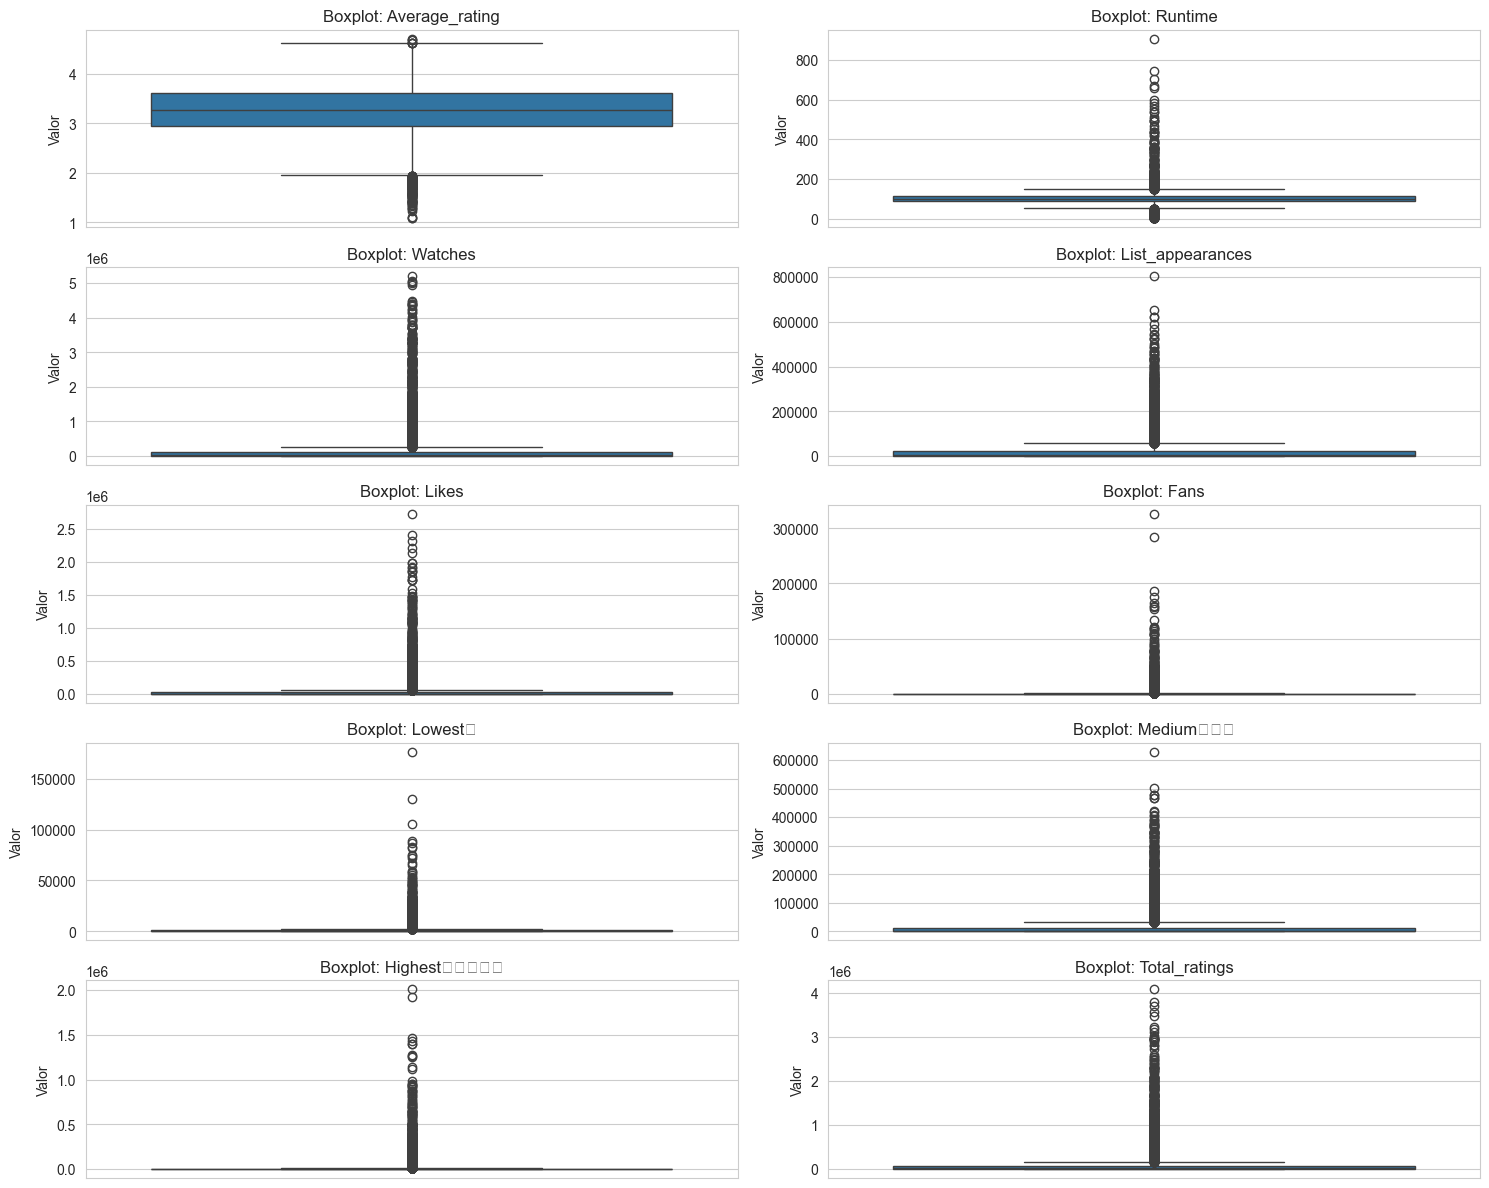

In [229]:

# Selecionar apenas colunas numéricas
df_numericas = df.select_dtypes(include='number')

# Número de variáveis numéricas
num_vars = df_numericas.shape[1]

# Criação dos subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 12)) 
axes = axes.flatten()  

# Plotar cada boxplot
for i, col in enumerate(df_numericas.columns):
    sns.boxplot(y=df_numericas[col], ax=axes[i])
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')

plt.tight_layout()
plt.show()

## Top 10 filmes com maior média de avaliação

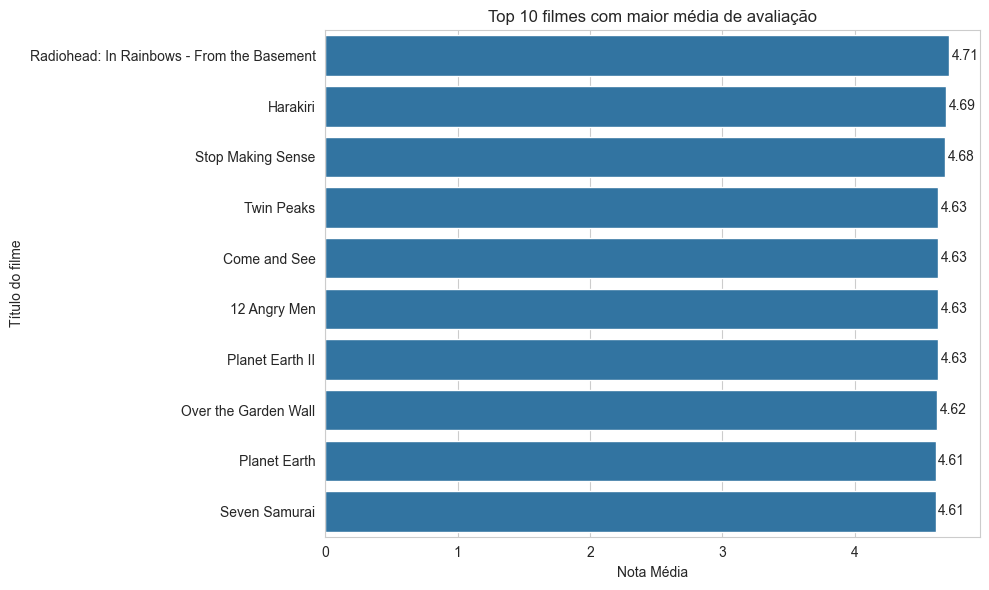

In [230]:
df_top10 = df[["Film_title", "Average_rating"]].sort_values("Average_rating", ascending=False).head(10)

#grafico
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_top10, x='Average_rating', y='Film_title')

plt.title('Top 10 filmes com maior média de avaliação')
plt.xlabel('Nota Média')
plt.ylabel('Título do filme')
for i, v in enumerate(df_top10['Average_rating']):
    plt.text(v +0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


### Linguagem dos filmes mais populares

In [231]:
# visualização de quantos filmes existem para cada linguagem no DataFrame
df['Original_language'].value_counts()

Original_language
English                             8074
Italian                              396
Japanese                             308
French                               291
Korean                               145
Spanish                              115
German                                96
No spoken language                    94
Chinese                               66
Danish                                60
Cantonese                             58
Russian                               43
Swedish                               32
Polish                                20
Dutch                                 20
Portuguese                            19
Romanian                              18
Persian (Farsi)                       15
Norwegian                             14
Arabic                                14
Czech                                 12
Greek (modern)                         9
Hindi                                  9
Hungarian                              

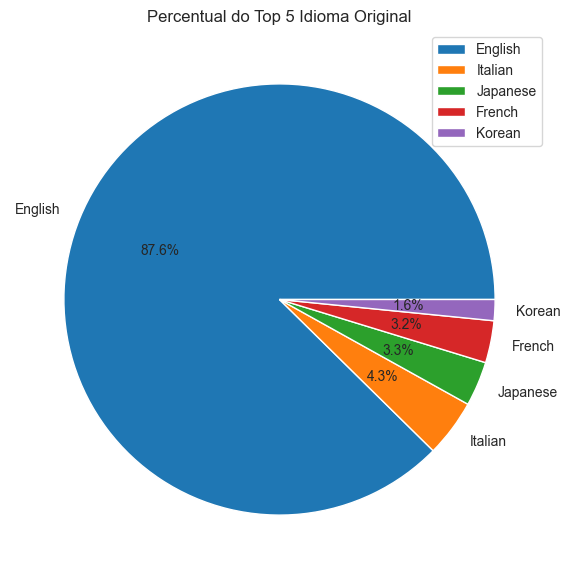

In [232]:

# gráfico com os 5 idiomas originais com mais filmes

top5_idiomas =df["Original_language"].value_counts().nlargest(5)
plt.figure(figsize=(9,7))
plt.pie(top5_idiomas,autopct="%1.1f%%",labels=top5_idiomas.index)
plt.legend()
plt.title("Percentual do Top 5 Idioma Original",fontsize=12)
plt.show()

### Média de notas para o top 10 Linguagem Original de Filmes

In [251]:
# criação do dataFrame com o idioma original com mais filmes e a nota média dos seus filmes
df_top10_idiomas = (
    df[df['Original_language'].isin(df['Original_language'].value_counts().nlargest(10).index)]
    .groupby('Original_language')['Average_rating'].mean()
    .reset_index(name='nota_media')
    .rename(columns={'Original_language': 'idioma_original'})
    .sort_values(by='nota_media', ascending=False)
)

df_top10_idiomas

,idioma_original,nota_media
8,No spoken language,3.637156
6,Japanese,3.600801
3,French,3.597706
0,Chinese,3.530085
4,German,3.500056
1,Danish,3.481593
9,Spanish,3.442358
7,Korean,3.417092
5,Italian,3.307558
2,English,3.210954


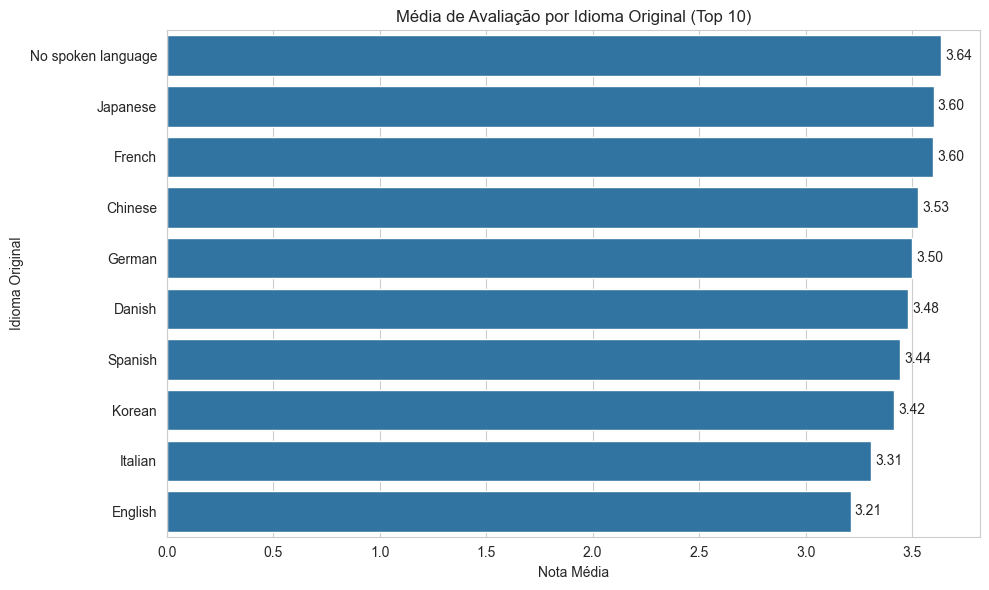

In [234]:
#gráfico com a média de avaliação
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_top10_idiomas, x='nota_media', y='idioma_original')

plt.title('Média de Avaliação por Idioma Original (Top 10)')
plt.xlabel('Nota Média')
plt.ylabel('Idioma Original')
for i, v in enumerate(df_top10_idiomas['nota_media']):
    plt.text(v +0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

### Top 20 filmes mais longos

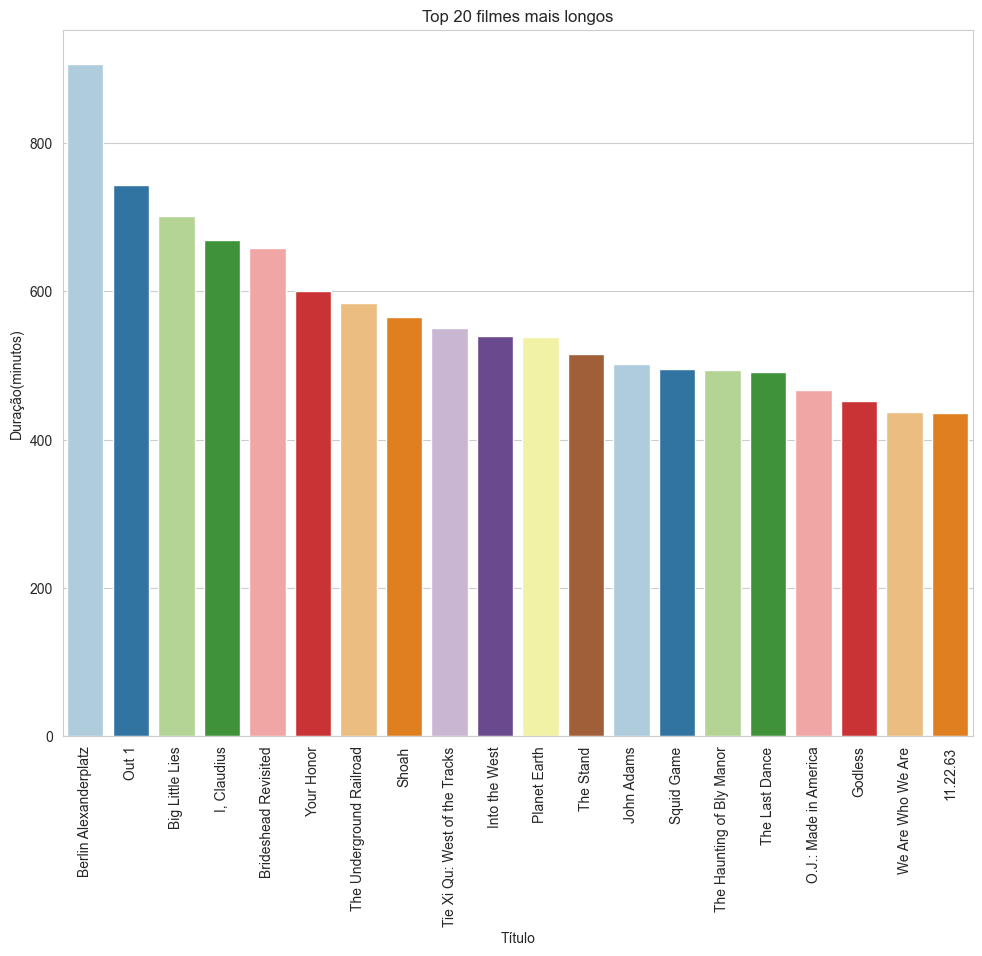

In [235]:
# criação do DataFrame
df_top20_longos = df[["Film_title", "Runtime"]]
df_top20_longos = df_top20_longos.sort_values("Runtime", ascending=False).head(20)

# gráfico
plt.figure(figsize=(10,8))
sns.barplot(data=df_top20_longos,x="Film_title",y="Runtime",palette="Paired", hue="Film_title")
plt.title("Top 20 filmes mais longos")
plt.xlabel('Título')
plt.ylabel('Duração(minutos)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Avaliação dos filmes mais engajados

In [236]:
#cálculo de um índice total de engajamento
df['Indice_engajamento'] = (
    3 * df['Watches'] +
    2 * df['Likes'] +
    1 * df['Fans']
)

# criação do DataFrame de engajamento
df_engajados=df[['Film_title', 'Watches', 'Likes', 'Fans', 'Indice_engajamento']].sort_values(["Watches","Likes","Fans"],ascending=False)

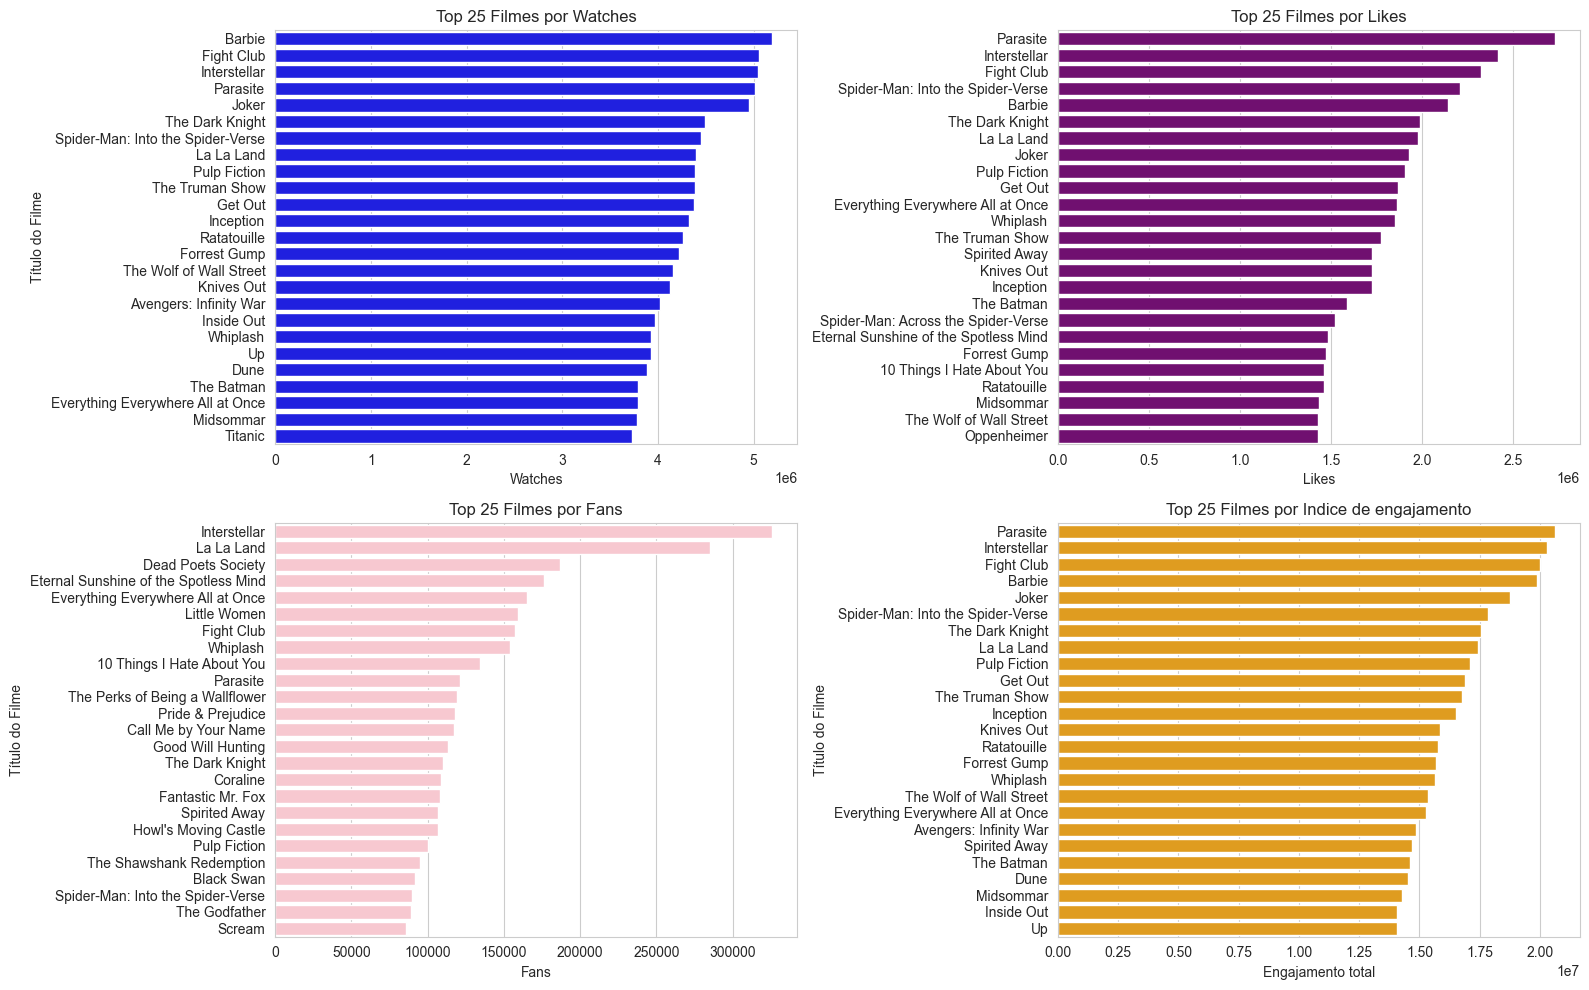

In [237]:
# Seleciona os top 25 por cada métrica 
top_watches = df_engajados.sort_values("Watches", ascending=False).head(25)
top_likes = df_engajados.sort_values("Likes", ascending=False).head(25)
top_fans = df_engajados.sort_values("Fans", ascending=False).head(25)
top_engajamento = df_engajados.sort_values("Indice_engajamento", ascending=False).head(25)

# Criação dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top por Watches
sns.barplot(data=top_watches, x="Watches", y="Film_title", ax=axes[0,0], color="blue")
axes[0,0].set_title("Top 25 Filmes por Watches")
axes[0,0].set_xlabel("Watches")
axes[0,0].set_ylabel("Título do Filme")

# Top por Likes
sns.barplot(data=top_likes, x="Likes", y="Film_title", ax=axes[0,1], color="purple")
axes[0,1].set_title("Top 25 Filmes por Likes")
axes[0,1].set_xlabel("Likes")
axes[0,1].set_ylabel("")


# Top por Fans
sns.barplot(data=top_fans, x="Fans", y="Film_title", ax=axes[1,0], color="pink")
axes[1,0].set_title("Top 25 Filmes por Fans")
axes[1,0].set_xlabel("Fans")
axes[1,0].set_ylabel("Título do Filme")

# Top por enjamento total
sns.barplot(data=top_engajamento, x="Indice_engajamento", y="Film_title", ax=axes[1,1], color="orange")
axes[1,1].set_title("Top 25 Filmes por Indice de engajamento")
axes[1,1].set_xlabel("Engajamento total")
axes[1,1].set_ylabel("Título do Filme")

# plotar o gráfico
plt.tight_layout()
plt.show()




### Estúdios com as maiores audiências

In [252]:
df_estudios = (df[['Studios', 'Watches']].dropna(subset=['Studios'])
              .query("Studios.str.lower() != 'unknown'", engine='python').copy()
)
df_estudios['Studios'] = df_estudios['Studios'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_estudios = df_estudios.explode('Studios').groupby('Studios', as_index=False)['Watches'].sum()
top_10_estudios = df_estudios.sort_values('Watches', ascending=False).head(10)

top_10_estudios




,Studios,Watches
9728,Warner Bros. Pictures,176372771
1953,Columbia Pictures,122981979
6749,Paramount Pictures,109662984
42,20th Century Fox,108257599
9447,Universal Pictures,107448031
9693,Walt Disney Pictures,97167733
5650,Marvel Studios,63197675
6962,Pixar,53337724
6256,New Line Cinema,47704203
4010,Heyday Films,43412548


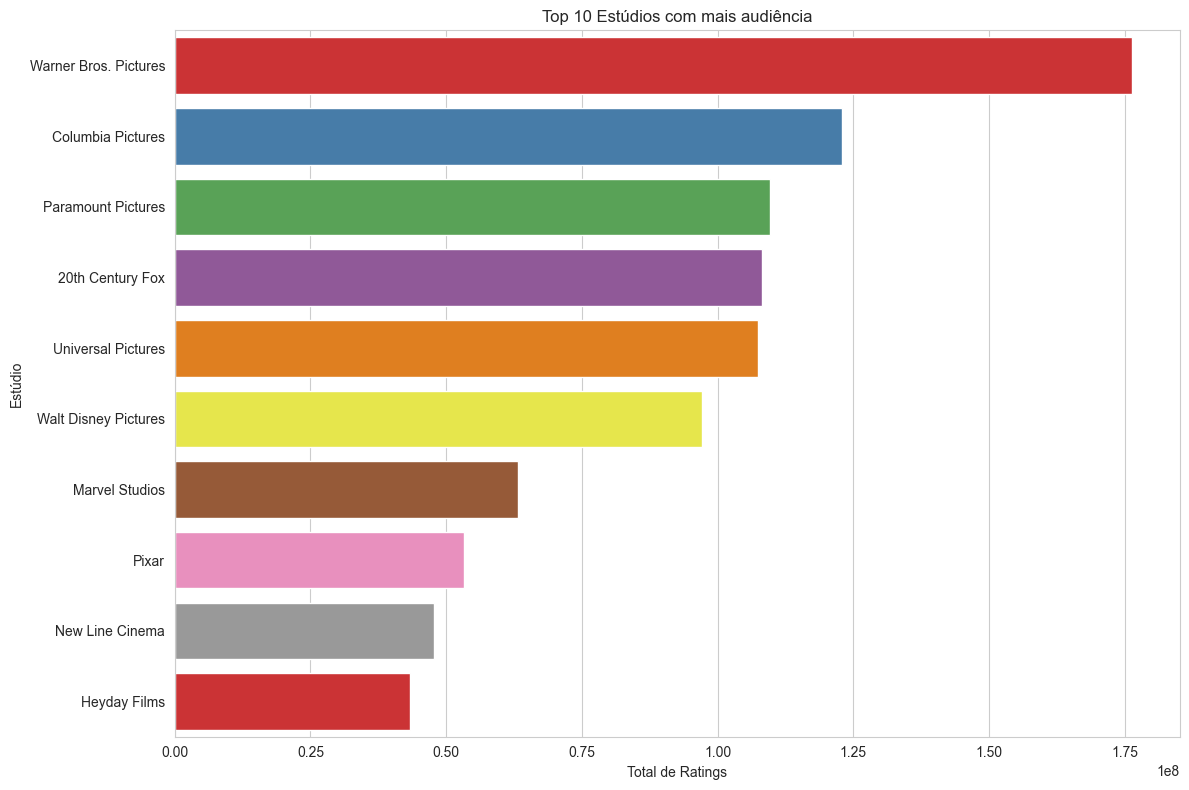

In [253]:
# gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_estudios, x='Watches', y='Studios', palette='Set1', hue='Studios')
plt.title('Top 10 Estúdios com mais audiência')
plt.xlabel('Total de Ratings')
plt.ylabel('Estúdio')
plt.tight_layout()
plt.show()


### Gêneros de filme com maiores audiências

In [240]:
df_generos = (df[['Genres', 'Watches']].dropna(subset=['Genres'])
              .query("Genres.str.lower() != 'unknown'", engine='python').copy()
)
df_generos['Genres'] = df_generos['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_generos = df_generos.explode('Genres').groupby('Genres', as_index=False)['Watches'].sum()
top_10_generos = df_generos.sort_values('Watches', ascending=False).head(10)
top_10_generos = df_generos.sort_values('Watches', ascending=False).head(10)

top_10_generos

,Genres,Watches
7,Drama,703886627
4,Comedy,567136616
1,Adventure,483876368
0,Action,430243623
24,Thriller,356293903
20,Science Fiction,323224128
12,Fantasy,276606336
11,Family,251936069
19,Romance,245535613
5,Crime,243431948


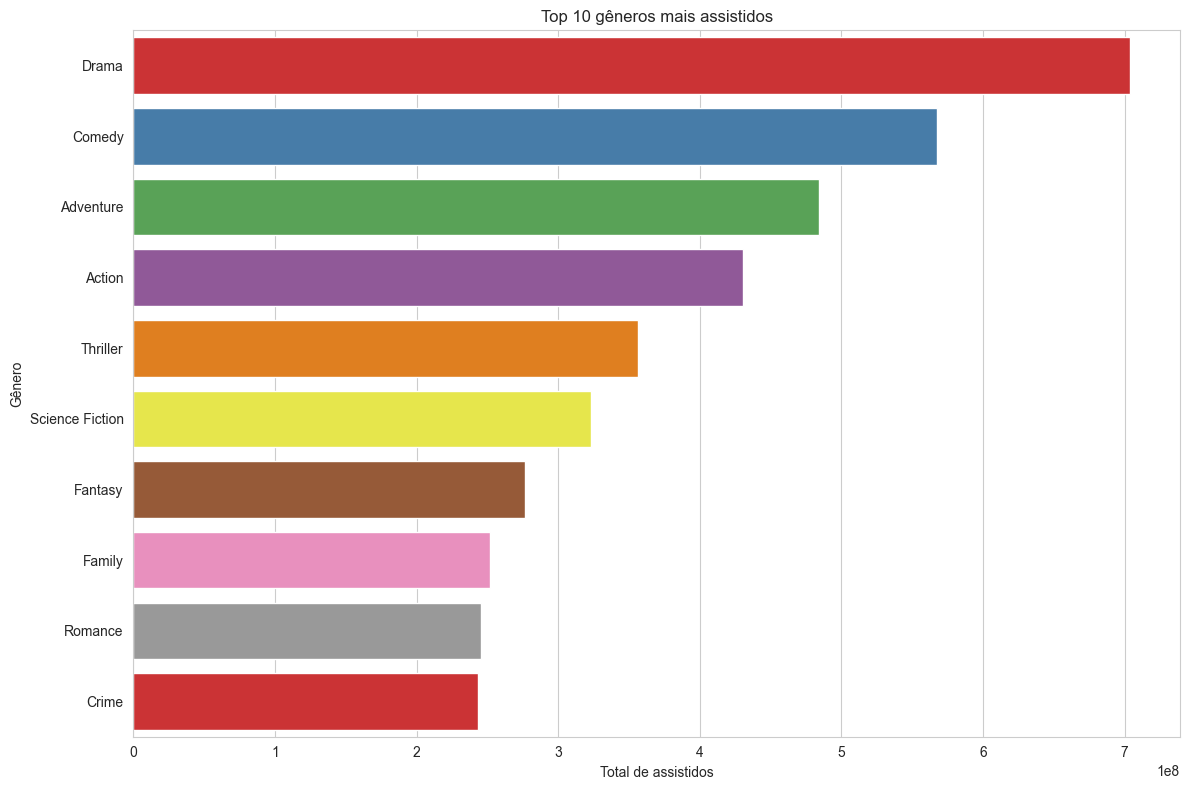

In [241]:
# gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_generos, x='Watches', y='Genres', palette='Set1', hue='Genres')
plt.title('Top 10 gêneros mais assistidos')
plt.xlabel('Total de assistidos')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

### Top 20 diretores com os filmes mais avaliados



In [242]:
# Criação do DataFrame com o Top 20 diretores e seus filmes com base no total de avaliações
top20_diretores = df.groupby(["Film_title", "Director"])["Total_ratings"]\
                .sum().nlargest(20).reset_index()

# Criação da nova coluna
top20_diretores["Film_Director"] = top20_diretores["Film_title"] + " (" + top20_diretores["Director"] + ")"

top20_diretores

,Film_title,Director,Total_ratings,Film_Director
0,Barbie,Greta Gerwig,4091037,Barbie (Greta Gerwig)
1,Parasite,Bong Joon Ho,3800561,Parasite (Bong Joon Ho)
2,Interstellar,Christopher Nolan,3700599,Interstellar (Christopher Nolan)
3,Fight Club,David Fincher,3581103,Fight Club (David Fincher)
4,Joker,Todd Phillips,3475013,Joker (Todd Phillips)
5,La La Land,Damien Chazelle,3220252,La La Land (Damien Chazelle)
6,Spider-Man: Into the Spider-Verse,"Bob Persichetti, Peter Ramsey",3177015,Spider-Man: Into the Spider-Verse (Bob Persich...
7,Get Out,Jordan Peele,3121586,Get Out (Jordan Peele)
8,Everything Everywhere All at Once,"Daniel Scheinert, Daniel Kwan",3020239,Everything Everywhere All at Once (Daniel Sche...
9,The Dark Knight,Christopher Nolan,2992201,The Dark Knight (Christopher Nolan)


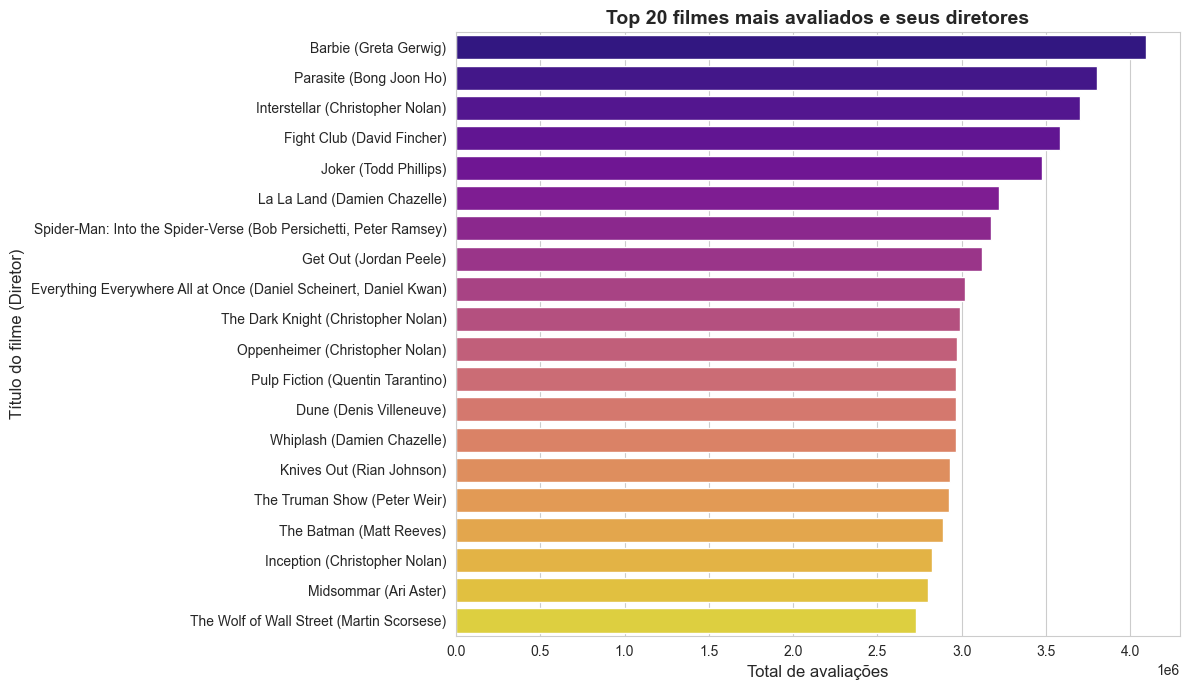

In [243]:
#gráfico
plt.figure(figsize=(12, 7))
sns.barplot(data=top20_diretores, x="Total_ratings", y="Film_Director", palette="plasma", hue='Film_Director')

plt.title("Top 20 filmes mais avaliados e seus diretores", fontweight="bold", fontsize=14)
plt.xlabel("Total de avaliações", fontsize=12)
plt.ylabel("Título do filme (Diretor)", fontsize=12)
plt.tight_layout()
plt.show()

### Top 20 diretores com mais filmes

In [262]:
#criação do DataFrame com os 15 com mais filmes
top20_diretoresFilmes = (
    df[df['Director'].isin(df['Director'].value_counts().nlargest(20).index)]
    .groupby('Director')
    .agg(quantidade_filmes=('Director', 'count'),
         Nota_media=('Average_rating', 'mean'))
    .reset_index()
    .sort_values(by='quantidade_filmes', ascending=False)
)

top20_diretoresFilmes['Nota_media'] = top20_diretoresFilmes['Nota_media'].round(2)
top20_diretoresFilmes


,Director,quantidade_filmes,Nota_media
1,Chuck Jones,50,3.74
2,Cirio H. Santiago,42,3.07
0,Antonio Margheriti,39,3.07
10,Robert Stevenson,31,3.20
16,Steven Spielberg,31,3.61
18,William Witney,28,3.25
12,Roy Rowland,28,3.28
11,Roger Corman,28,3.14
14,Sergio Martino,27,3.18
13,Sergio Corbucci,26,3.33


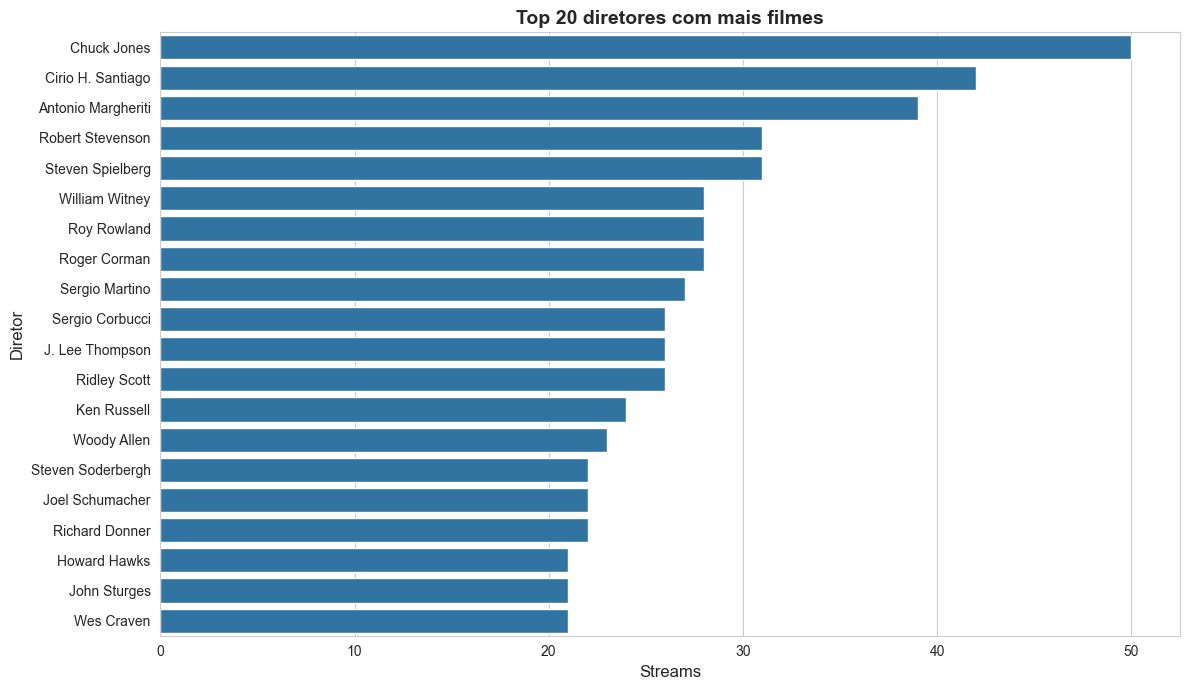

In [263]:
#gráfico
plt.figure(figsize=(12, 7))
sns.barplot(data=top20_diretoresFilmes, x=top20_diretoresFilmes['quantidade_filmes'], y=top20_diretoresFilmes['Director'])

plt.title("Top 20 diretores com mais filmes", fontweight="bold", fontsize=14)
plt.xlabel("Streams", fontsize=12)
plt.ylabel("Diretor", fontsize=12)
plt.tight_layout()
plt.show()

### Top 20 diretores mais populares

In [ ]:
top20_diretoresPopular = (
    df[df['Director'].isin(df.groupby(["Director"])["Watches"].sum().nlargest(20).index)]
    .groupby('Director')
    .agg(quantidade_filmes=('Director', 'count'),
         Nota_media=('Average_rating', 'mean'),
         Assistido=('Watches', 'sum'))
    .reset_index()
    .sort_values(by='Assistido', ascending=False)
)
top20_diretoresPopular

,Director,quantidade_filmes,Nota_media,Assistido
2,Christopher Nolan,11,3.970909,28325967
17,Steven Spielberg,31,3.610000,26694256
12,Quentin Tarantino,10,4.053000,23626115
3,David Fincher,10,3.768000,20516412
10,Martin Scorsese,20,3.910000,16542747
18,Tim Burton,19,3.457895,14998836
8,Hayao Miyazaki,12,4.092500,14379355
1,Chris Columbus,12,3.242500,13910798
19,Wes Anderson,12,3.874167,13807537
4,David Yates,7,3.544286,13114602


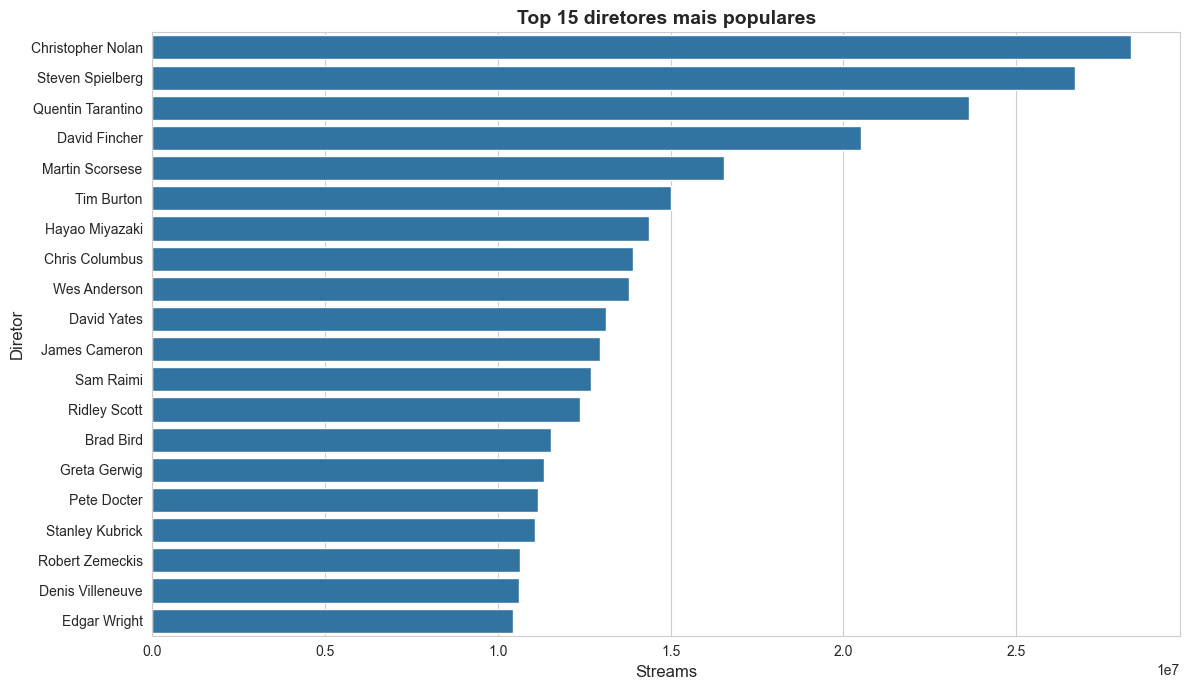

In [ ]:
#gráfico
plt.figure(figsize=(12, 7))
sns.barplot(data=top20_diretoresPopular, x=top20_diretoresPopular['Assistido'], y=top20_diretoresPopular['Director'])

plt.title("Top 20 diretores mais populares", fontweight="bold", fontsize=14)
plt.xlabel("Streams", fontsize=12)
plt.ylabel("Diretor", fontsize=12)
plt.tight_layout()
plt.show()


### TOP 30 filmes com mais fãs e seu gênero principal

In [258]:
df_filmes_generos = (
    df[['Film_title', 'Fans', 'Genres', 'Director']].dropna(subset=['Genres'])
    .query("Genres.str.lower() != 'unknown'", engine='python').copy()
)
df_filmes_generos['Genres'] = df_filmes_generos['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_filmes_generos['Genero_principal'] = df_filmes_generos['Genres'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
top30_filmes_generos = df_filmes_generos[['Film_title', 'Genero_principal', 'Fans']].sort_values(by='Fans', ascending=False).head(30)
top30_filmes_generos

,Film_title,Genero_principal,Fans
243,Interstellar,Science Fiction,326000
88,La La Land,Drama,285000
4375,Dead Poets Society,Drama,187000
1531,Eternal Sunshine of the Spotless Mind,Science Fiction,176000
9125,Everything Everywhere All at Once,Science Fiction,165000
9598,Little Women,Romance,159000
265,Fight Club,Drama,157000
21,Whiplash,Drama,154000
587,10 Things I Hate About You,Comedy,134000
7553,Parasite,Comedy,121000


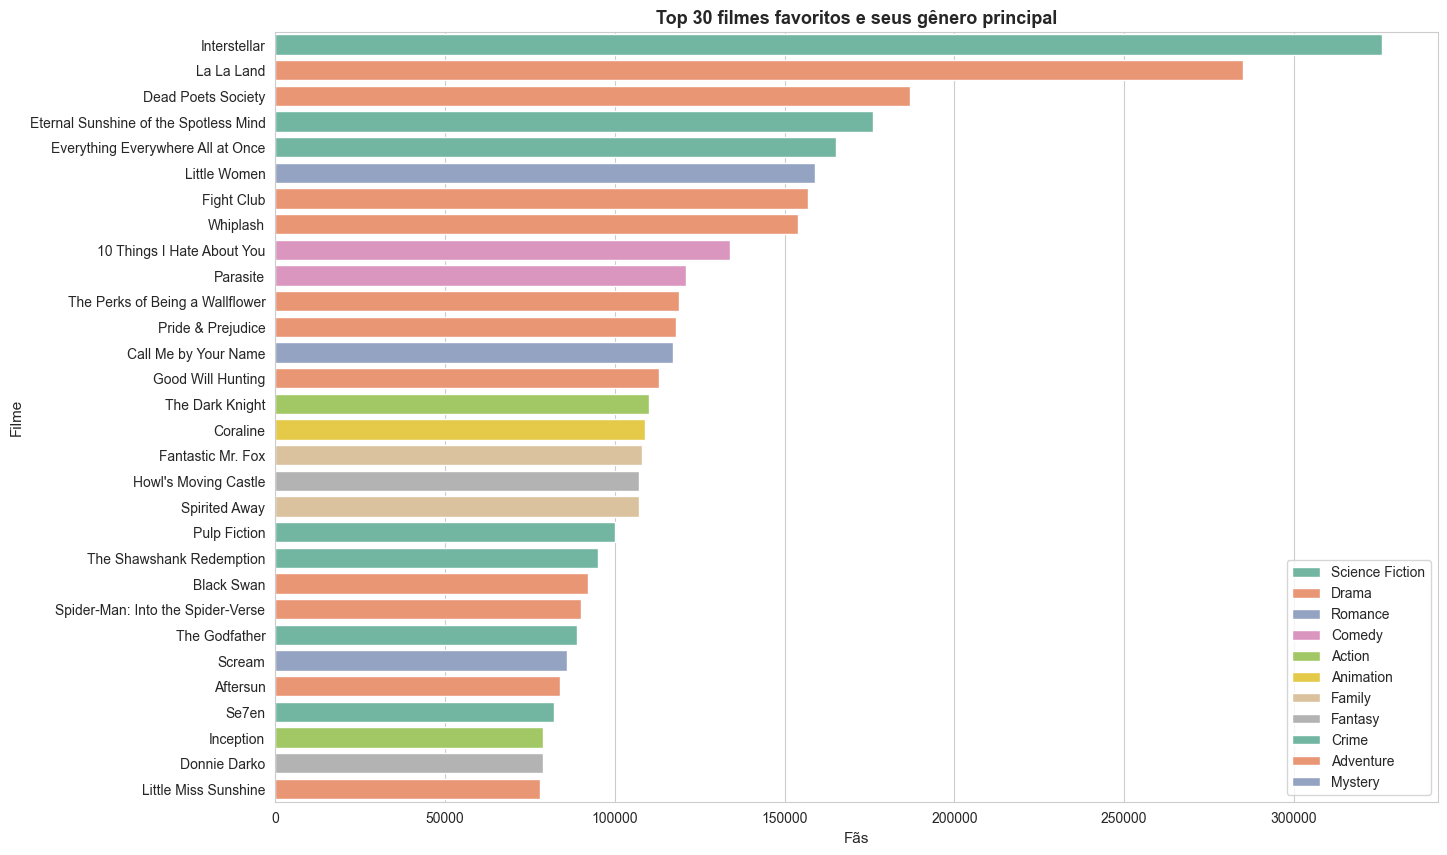

In [259]:
# gráfico
plt.figure(figsize=(15,10))
sns.barplot(data=top30_filmes_generos,x="Fans",y="Film_title",hue="Genero_principal", palette='Set2')
plt.title("Top 30 filmes favoritos e seus gênero principal",fontweight="bold",fontsize=13)
plt.xlabel("Fãs",fontsize=11)
plt.ylabel("Filme",fontsize=11)
plt.legend()
plt.show()

### Distribuição das notas dos filmes

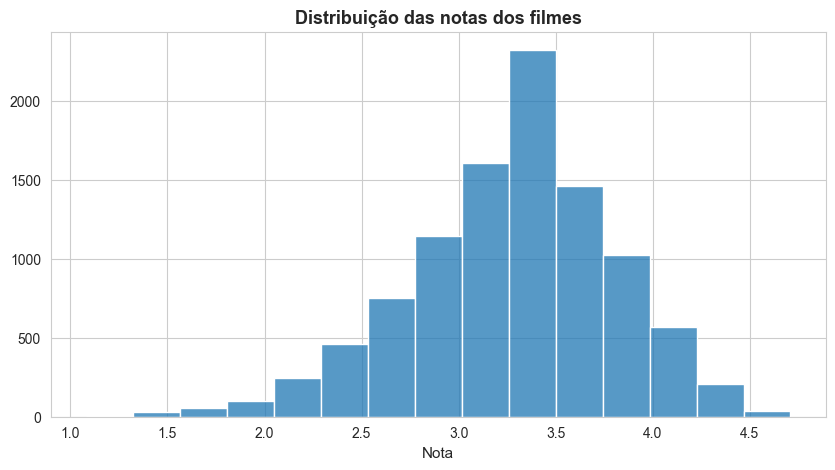

In [249]:
#gráfico de histpgrama
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Average_rating', bins=15)
plt.title("Distribuição das notas dos filmes",fontweight="bold",fontsize=13)
plt.xlabel("Nota",fontsize=11)
plt.ylabel("")
plt.show()

### Top 20 filmes por avaliação(baixa, média, alta)

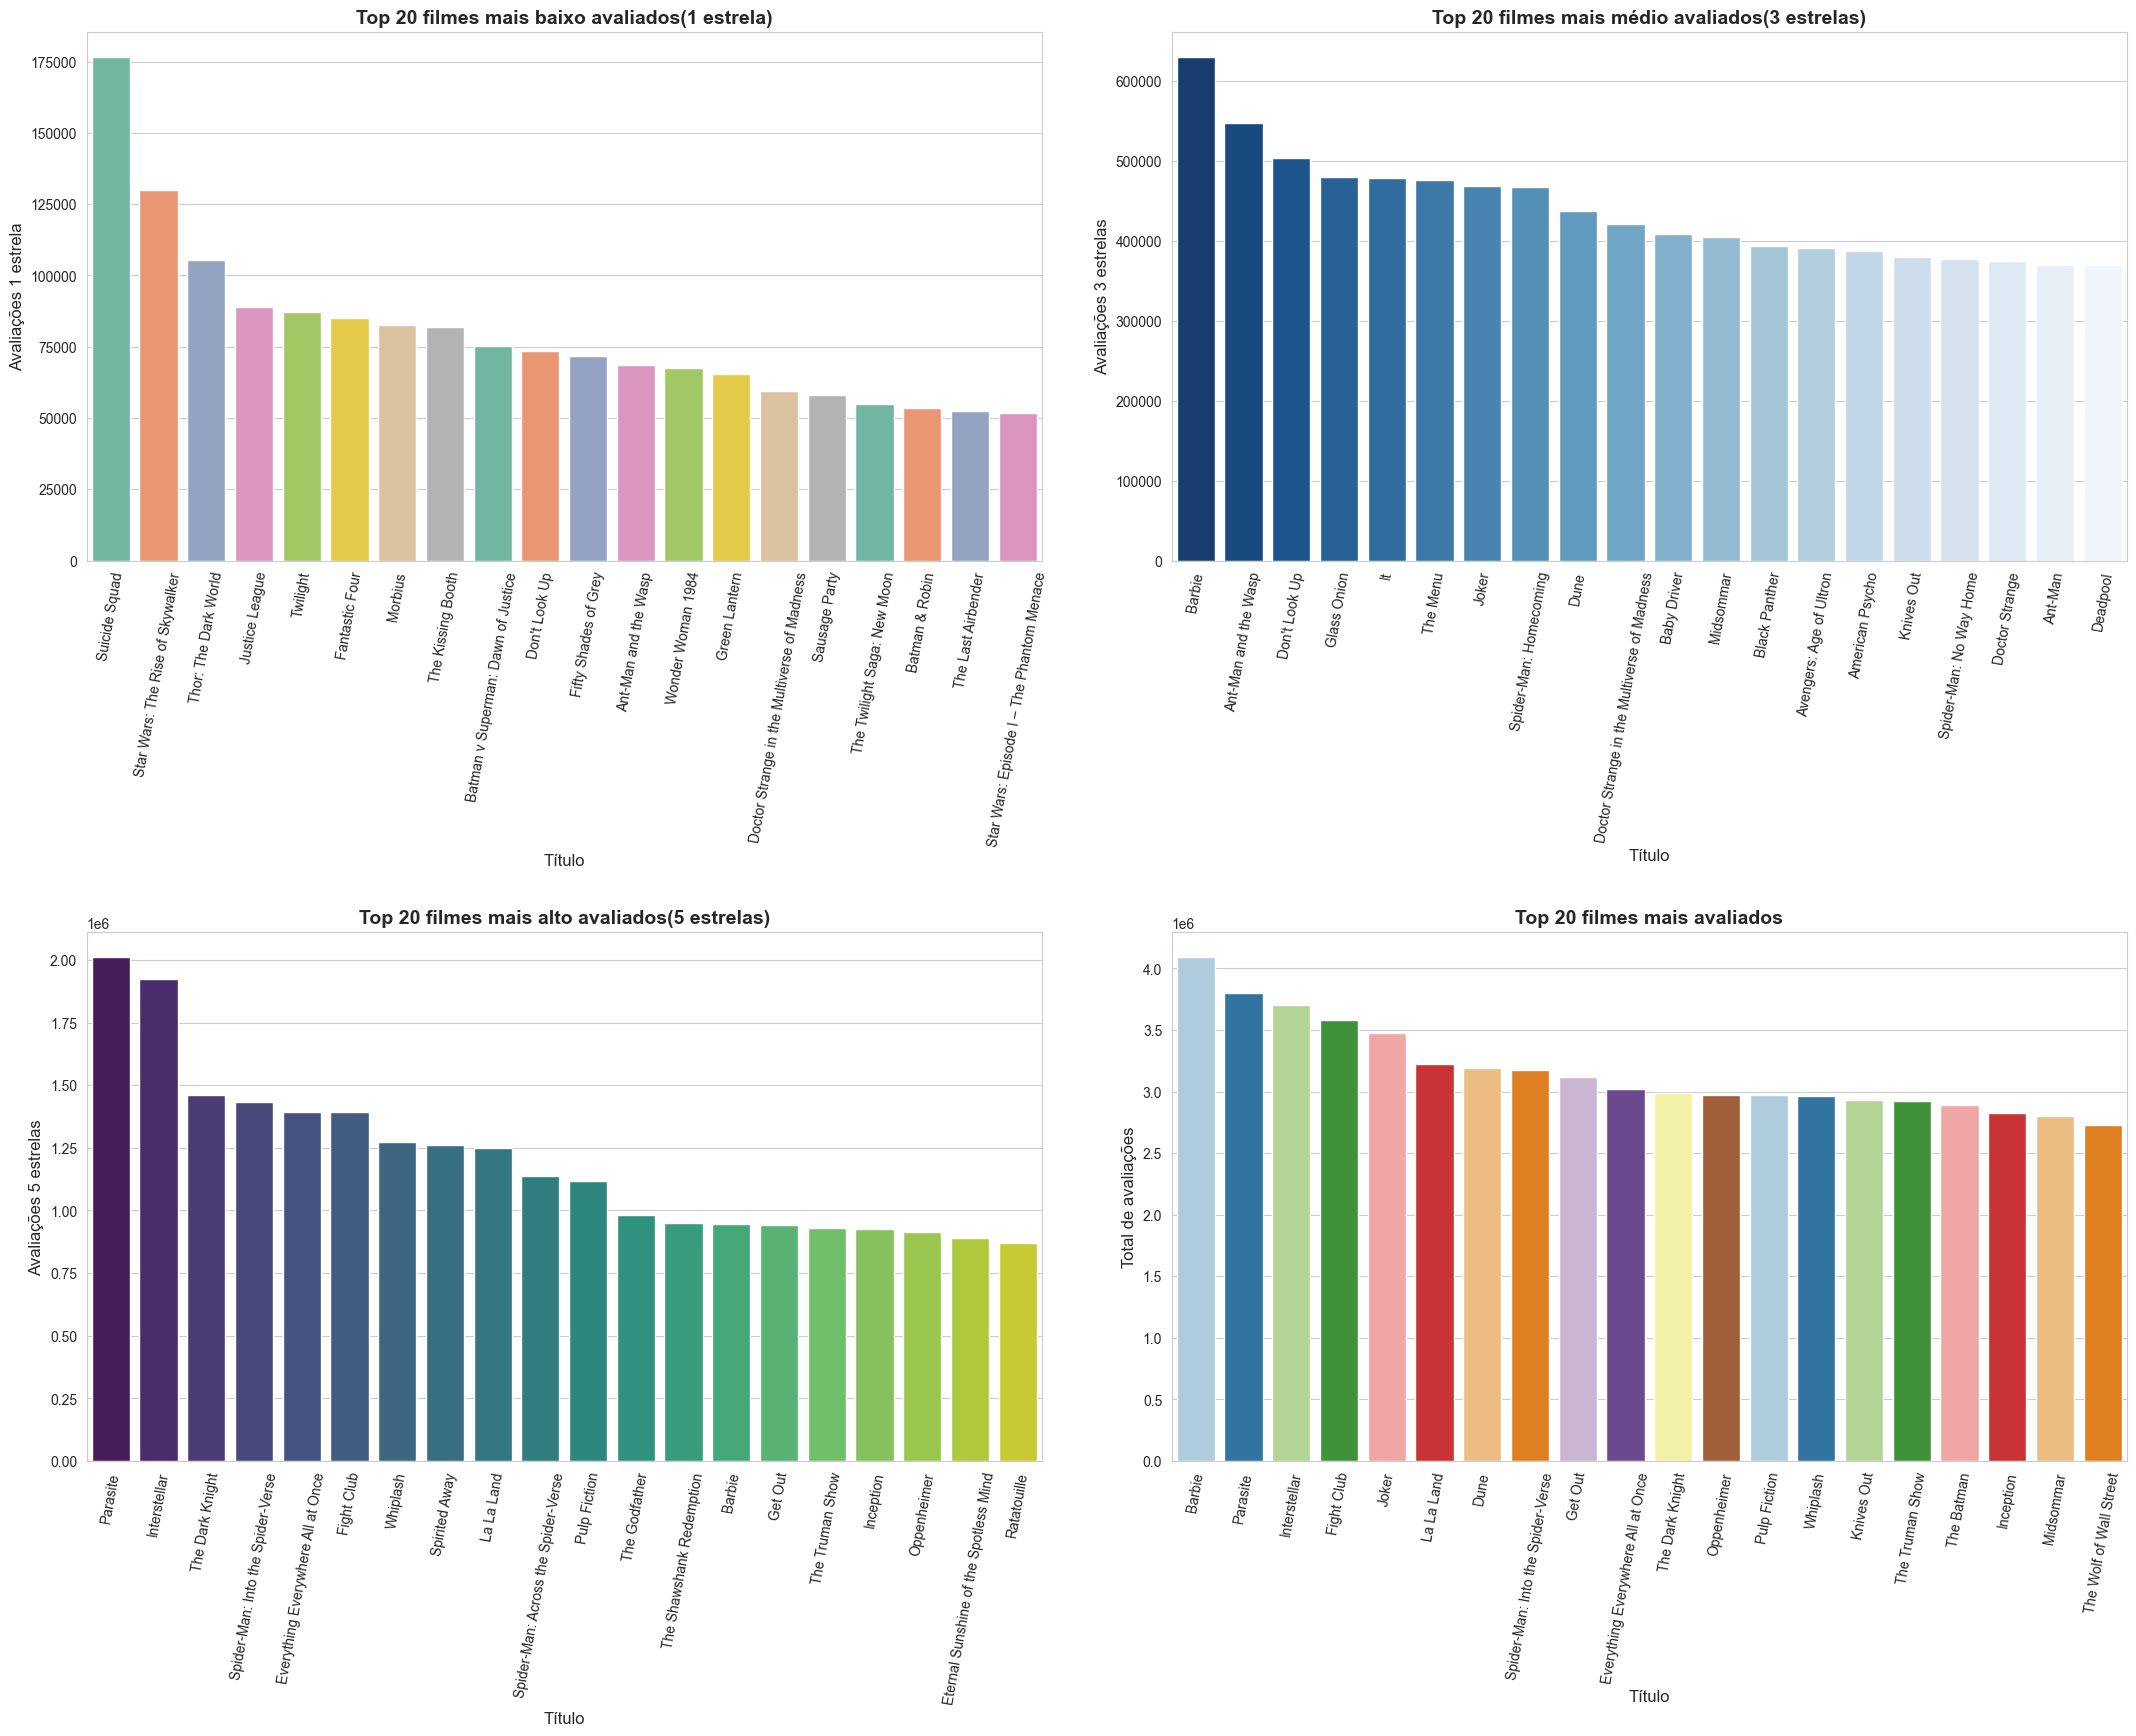

In [ ]:
# Top 20 filmes mais avaliados com 1 estrela
baixa_aval = df.groupby("Film_title")["Lowest★"].sum().reset_index()
baixa_aval = baixa_aval.sort_values("Lowest★", ascending=False).head(20)

# Top 20 filmes mais avaliados com 3 estrelas
media_aval = df.groupby("Film_title")["Medium★★★"].sum().reset_index()
media_aval = media_aval.sort_values("Medium★★★", ascending=False).head(20)

# Top 20 filmes mais avaliados com 5 estrelas
alto_aval = df.groupby("Film_title")["Highest★★★★★"].sum().reset_index()
alto_aval =alto_aval.sort_values("Highest★★★★★", ascending=False).head(20)

# Top 20 filmes mais avaliados
total_aval = df.groupby("Film_title")["Total_ratings"].sum().reset_index()
total_aval = total_aval.sort_values("Total_ratings", ascending=False).head(20)

sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(22, 18))

#gráfico para os mais baixo avaliados
sns.barplot(data=baixa_aval, x="Film_title", y="Lowest★", palette="Set2", ax=axs[0, 0], hue='Film_title')
axs[0, 0].set_title("Top 20 filmes mais baixo avaliados(1 estrela)", fontsize=14, fontweight="bold")
axs[0, 0].set_xlabel("Título", fontsize=12)
axs[0, 0].set_ylabel("Avaliações 1 estrela", fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=80)

#gráfico para os mais médio avaliados
sns.barplot(data=media_aval, x="Film_title", y="Medium★★★", palette="Blues_r", ax=axs[0, 1], hue='Film_title')
axs[0, 1].set_title("Top 20 filmes mais médio avaliados(3 estrelas)", fontweight="bold", fontsize=14)
axs[0, 1].set_xlabel("Título", fontsize=12)
axs[0, 1].set_ylabel("Avaliações 3 estrelas", fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=80)

#gráfico para os mais alto avaliados
sns.barplot(data=alto_aval, x="Film_title", y="Highest★★★★★", palette="viridis", ax=axs[1, 0], hue='Film_title')
axs[1, 0].set_title("Top 20 filmes mais alto avaliados(5 estrelas)", fontweight="bold", fontsize=14)
axs[1, 0].set_xlabel("Título", fontsize=12)
axs[1, 0].set_ylabel("Avaliações 5 estrelas", fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=80)

#gráfico para os mais avaliados geral
sns.barplot(data=total_aval, x="Film_title", y="Total_ratings", palette="Paired", ax=axs[1, 1], hue='Film_title')
axs[1, 1].set_title("Top 20 filmes mais avaliados", fontweight="bold", fontsize=14)
axs[1, 1].set_xlabel("Título", fontsize=12)
axs[1, 1].set_ylabel("Total de avaliações", fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=80)

plt.tight_layout(pad=3.0)
plt.show()

## Análise final(07/2025)


#### ⚡Filmes mais bem avaliados
Radiohead In Rainbows - From the Basement foi a produção mais bem avaliada, com média de 4.71, seguido por Harakiri(4.69) Stop Making Sense(4.68). O primeiro trata-se de uma aprasentação da banda Radioheah, o segundo é um filme japonês dos anos 60 e o terceiro também é uma apresentação de uma banda, Talking Heads. Isso demonstra que 3 filmes mais bem avaliados não são filmes convencionais e nem recentes(deste século).

#### ⚡Idioma Original
A maioria dos filmes presentes na base de dados, ou seja, que são mais populares no Letterboxd têm como Idioma Original o inglês, italiano, japonês, francês e coreano, sendo que dentre os 5, a língua inglesa domina com quase 90% dos filmes. Apesar disso, dentre os 10 idiomas com mais filmes, a língua inglesa aparece em último lugar ao comparar a nota média dos filmes, com 3.21, enquanto o filmes sem linguagem falada está em primeiro lugar com 3.6, o que  demonstra que a predominância da língua inglesa nos filmes não é sinônimo de qualidade.


#### ⚡Filmes longos
O filme mais longo foi Berlin Alexanderplatz, que na verdade é uma minisérie, com quase 900 minutos de duração, seguido de Out 1 e Big Little Lies.

#### ⚡Engajamento dos filmes
O engajamento dos filmes foi analisado pelo número de fãs, streams, Likes e um índice calculado de engajamento. Vários filmes se repetem nos 4 gráficos gerados, mas Interestellar, Fight Club e Parasite são os únicos que se repetem no Top 3 de cada gráfico, o que indica que esses 3 filmes são os mais famosos e engajados de todos os tempos até o pesente momento.

#### ⚡Estúdios mais visados
Os 5 estúdios de cinema com maior número de audiência são a Warner Bros. Pictures, Columbia Pictures, Paramount Pictures, 20th Century Fox, Universal Pictures. As 5 são bastante conhecidos, com  muitos anos no mercado e bastante versáteis nos filmes que produzem. E as 5 ultrapassam os 100 milhões de streams no Letterboxd.

#### ⚡Gêneros de filmes mais vistos(e favoritos)
Drama, Comédia, Aventura, Ação e Thriller são os 5 gêneros de filmes mais assistidos, estranhando o fato de Romance estar só em nono lugar. Porém, quando fazemos uma comparação dos gêneros principais dos filmes mais favoritados, percebemos a presneça marcante de Ficão Científica, Drama e Romance.

#### ⚡Diretores
Apesar de Christopher Nolan ter dirigido apenas 11 filmes(o que não o coloca nem entre os Top 20 com mais filmes), ele é o diretor com filmes mais assistidos e, entre os top 20 filmes mais avaliados, ele dirigiu 4. Greta Gerwig dirigiu o filme mais avaliado(Barbie) e é a décima quinta diretora mais popular, com apenas 3 filmes e sendo a única mulher. Por fim, ao comparar a lista dos diretores com mais filmes e a lista de diretores com filmes mais assistidos, percebe-se que poucos nomes se repetem, indicando que quantidade não implica em popularidade.

#### ⚡Filmes mais avaliados com notas altas, baixa e mediana
Os filmes que mais receberam nota 1 foram Suicide Squad, Star Wars: The Rise od Skywalker e Thor: The Dark World. Que mais recebera nota 3 foi Barbie, Ant-Man and the Wasp e Don't Look Up. E quem mais receberam nota 5 foi Parasite, Interestellar e The Dark Knight. 
> Barbie, apesar de ter sido bastante asssitido e avaliado, é considerado um filme mediano por um grande número de usuários do Letterboxd.

> Interestellar e Parasiste demonstram ser os dois filmes em que popularidade e qualidade percebida são mais coerentes

> Há uma presença marcante de filmes de super-herói, da saga Crepúsculo e da saga Star Wars na lista que mais recebram nota 1

#### ⚡Disribuição das notas dos filmes
Grande parte das notas se concentram entre 3 e 3.75, o que demonstra que a maioria das pessoas acham os filmes que assistem medianos.
